In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("StudentScore.xls")
print(data.head(5))

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [3]:
print(data.iloc[ :,5:8].corr())


               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


<Axes: >

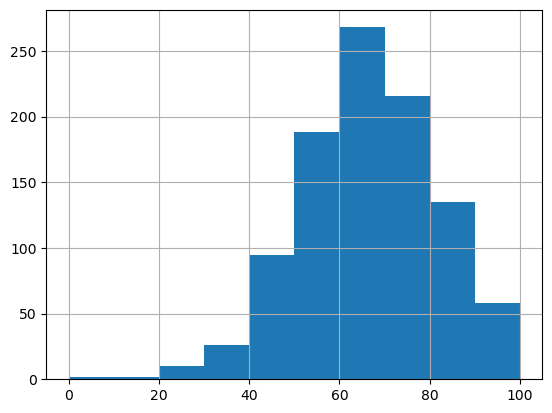

In [4]:
import matplotlib as plt
import seaborn as sn
data['math score'].hist()

In [5]:
#cac buoc tien xu li
#chia doc -> chia train,set -> xu ly du lieu bi miss -> scaler(lam cho du lieu ve cung khoang) ->

In [6]:
target = "math score" 
y = data[target]
x = data.drop(columns = target)

In [7]:
x.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
y.head(5)

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [10]:
from sklearn.impute import SimpleImputer
# imputer = imputer = SimpleImputer(strategy='mean')
# x["reading score"] = imputer.fit_transform(x[["reading score"]])

In [11]:
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x["reading score"] = scaler.fit_transform(x[["reading score"]])

In [12]:
from sklearn.pipeline import Pipeline
num_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", StandardScaler())
])



In [13]:
from sklearn.preprocessing import OrdinalEncoder
education_values = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]
gender_values = ["male", "female"]
lunch_values = x_train["lunch"].unique()
test_values = x_train["test preparation course"].unique()
ordinal_tranformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(categories=[education_values, gender_values, lunch_values, test_values])) #vd : chuyen education_values thanh 0,1,2,3,4,5
])

In [14]:
from sklearn.preprocessing import OneHotEncoder
nom_tranformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="constant", fill_value="khongbiet")),
    ("encoder", OneHotEncoder(sparse_output=False))
])

In [15]:
#chi ra cot nao dung phep bien doi nao
from sklearn.compose import ColumnTransformer
tienxuli = ColumnTransformer([
    ("num_feature", num_transformer, ["reading score", "writing score"]),
    ("ord_feature", ordinal_tranformer, ["parental level of education", "gender", "lunch", "test preparation course"]),
    ("nom_feature", nom_tranformer, ["race/ethnicity"])
    
])

In [40]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
reg = Pipeline(steps = [
    ("tienxuly", tienxuli),
    ("model_regression", RandomForestRegressor())
])
#reg.fit(x_train, y_train)

Pipeline(steps=[('tienxuly',
                 ColumnTransformer(transformers=[('num_feature',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['reading score',
                                                   'writing score']),
                                                 ('ord_feature',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['some '
                                                                                               'high '
                                                                                               'school',
                                                                                               'high '
                                                                                               'school',
                                                                                               'some '
                                                                                               'col...
                                                                                              array(['standard', 'free/reduced'], dtype=object),
                                                                                              array(['none', 'completed'], dtype=object)]))]),
                                                  ['parental level of '
                                                   'education',
                                                   'gender', 'lunch',
                                                   'test preparation course']),
                                                 ('nom_feature',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='khongbiet',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['race/ethnicity'])])),
                ('model_regression', RandomForestRegressor())])

In [17]:
# y_predict = reg.predict(x_test)
# for i,j in zip(y_test, y_predict):
#     print("label : {} du doan {}".format(i,j))

label : 91 du doan 77.98629529906171
label : 53 du doan 59.67066995073493
label : 80 du doan 75.07868879414434
label : 74 du doan 74.3776954454965
label : 84 du doan 85.65738539907787
label : 81 du doan 76.65565856964415
label : 69 du doan 64.53095054502063
label : 54 du doan 58.06017549522947
label : 87 du doan 71.37916936267906
label : 51 du doan 55.48014160863604
label : 45 du doan 51.15436461214475
label : 30 du doan 52.82734850927484
label : 67 du doan 70.19706784245935
label : 49 du doan 54.819856023871104
label : 85 du doan 83.77742998526307
label : 65 du doan 71.2902929051952
label : 53 du doan 53.721503665663604
label : 55 du doan 50.459222003374734
label : 48 du doan 54.1647637932286
label : 56 du doan 55.56503684325824
label : 79 du doan 69.41011076843569
label : 43 du doan 46.85714739228458
label : 45 du doan 60.28973316363974
label : 36 du doan 43.62164350578921
label : 80 du doan 73.95212411824461
label : 80 du doan 80.13180857357828
label : 68 du doan 75.03601609185291
l

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE {}".format(mean_absolute_error(y_test, y_predict))) #sai so tri tuyet doi
print("MSE {}".format(mean_squared_error(y_test, y_predict))) # sai so binh phuong
print("r2 {}".format(r2_score(y_test, y_predict)))

MAE 5.601828693469093
MSE 63.028441403745006
r2 0.7409844011313258


In [50]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "model_regression__n_estimators" : [50, 100, 200, 500],
    "model_regression__criterion": ["squared_error", "absolute_error", "poisson"],
    "tienxuly__num_feature__imputer__strategy" : ["mean", "median"]
}
model = GridSearchCV(reg, param_grid = parameters, scoring = "r2", cv = 6, verbose=2)
model.fit(x_train,y_train)

Fitting 6 folds for each of 24 candidates, totalling 144 fits
[CV] END model_regression__criterion=squared_error, model_regression__n_estimators=50, tienxuly__num_feature__imputer__strategy=mean; total time=   0.1s
[CV] END model_regression__criterion=squared_error, model_regression__n_estimators=50, tienxuly__num_feature__imputer__strategy=mean; total time=   0.0s
[CV] END model_regression__criterion=squared_error, model_regression__n_estimators=50, tienxuly__num_feature__imputer__strategy=mean; total time=   0.0s
[CV] END model_regression__criterion=squared_error, model_regression__n_estimators=50, tienxuly__num_feature__imputer__strategy=mean; total time=   0.0s
[CV] END model_regression__criterion=squared_error, model_regression__n_estimators=50, tienxuly__num_feature__imputer__strategy=mean; total time=   0.0s
[CV] END model_regression__criterion=squared_error, model_regression__n_estimators=50, tienxuly__num_feature__imputer__strategy=mean; total time=   0.0s
[CV] END model_regre

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('tienxuly',
                                        ColumnTransformer(transformers=[('num_feature',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['reading '
                                                                          'score',
                                                                          'writing '
                                                                          'score']),
                                                                        ('ord_feature',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OrdinalEncoder(categories=[['some '
                                                                                                                      'high '
                                                                                                                      's...
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(sparse_output=False))]),
                                                                         ['race/ethnicity'])])),
                                       ('model_regression',
                                        RandomForestRegressor())]),
             param_grid={'model_regression__criterion': ['squared_error',
                                                         'absolute_error',
                                                         'poisson'],
                         'model_regression__n_estimators': [50, 100, 200, 500],
                         'tienxuly__num_feature__imputer__strategy': ['mean',
                                                                      'median']},
             scoring='r2', verbose=2)

In [52]:
print(model.best_score_)
print(model.best_params_)

0.8345050659381211
{'model_regression__criterion': 'squared_error', 'model_regression__n_estimators': 500, 'tienxuly__num_feature__imputer__strategy': 'mean'}


In [67]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
print(predictions)

ModuleNotFoundError: No module named 'lazypredict'